In [1]:
from pystac_client import Client
import fsspec
import xarray as xr
import h5py

In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [9]:
token = 'eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJQXzJqUU50Y3QtOGR2cW1qVG5QWDVNc3BfT1Zid2lzVFlHbmFwM2tUWVdJIn0.eyJleHAiOjE3NDcyNDk2NjYsImlhdCI6MTc0NzIxMzY2NiwianRpIjoiMGNjMzdkNDAtZDM1YS00MmMzLWJlZWMtODVhNGRiNWY4YzBiIiwiaXNzIjoiaHR0cHM6Ly9pYW0ubWFhcC5lby5lc2EuaW50L3JlYWxtcy9lc2EtbWFhcCIsInN1YiI6IjhhYjZmMWMyLWUzYmUtNDAyNC04YTBlLTg2YWMxZmViOGI3ZiIsInR5cCI6IkJlYXJlciIsImF6cCI6ImJpby1wZGdzLXN5cy11c2VycyIsInNpZCI6IjYwMzk3YjQ1LTQ2MDYtNGYyOS1hYWM2LTIzYTVkYmIxYzcyMSIsInNjb3BlIjoib3BlbmlkIiwiZ3JvdXBzIjpbIi9jb2xsZWN0aW9ucy9CSU9NQVNTLVBER1MvQmlvbWFzc0F1eCIsIi9jb2xsZWN0aW9ucy9CSU9NQVNTLVBER1MvQmlvbWFzc0F1eElPQyIsIi9jb2xsZWN0aW9ucy9CSU9NQVNTLVBER1MvQmlvbWFzc0F1eFJlc3QiLCIvY29sbGVjdGlvbnMvQklPTUFTUy1QREdTL0Jpb21hc3NMZXZlbDAiLCIvY29sbGVjdGlvbnMvQklPTUFTUy1QREdTL0Jpb21hc3NMZXZlbDBJT0MiLCIvY29sbGVjdGlvbnMvQklPTUFTUy1QREdTL0Jpb21hc3NMZXZlbDFhIiwiL2NvbGxlY3Rpb25zL0JJT01BU1MtUERHUy9CaW9tYXNzTGV2ZWwxYUlPQyIsIi9jb2xsZWN0aW9ucy9CSU9NQVNTLVBER1MvQmlvbWFzc0xldmVsMWIiLCIvY29sbGVjdGlvbnMvQklPTUFTUy1QREdTL0Jpb21hc3NMZXZlbDFiSU9DIiwiL2NvbGxlY3Rpb25zL0JJT01BU1MtUERHUy9CaW9tYXNzTGV2ZWwxYyIsIi9jb2xsZWN0aW9ucy9CSU9NQVNTLVBER1MvQmlvbWFzc0xldmVsMWNJT0MiLCIvY29sbGVjdGlvbnMvQklPTUFTUy1QREdTL0Jpb21hc3NMZXZlbDJhIiwiL2NvbGxlY3Rpb25zL0JJT01BU1MtUERHUy9CaW9tYXNzTGV2ZWwyYUlPQyIsIi9leHBsb3JlciJdfQ.ZqKwa0cMB6lqslOIZ741HItTdNaoXjcVG9FnmfozKX-Yvw2zafoXufEIxBPIK9vm1s33LHQQjuSqBPC6hr2n07cf2kImxh8ZHLujuJHMafpUDgtqApYrHa9bQqlCF7-XT4N_Qlp7IfUAN5--JLVHVuFS0uzPfcjHAWljRj69iX0AJOIfOD7KR5KTo_GPB3ctFvGNgb1qfI5T_cS0EUDjzD5iudJMO8pNGTDfHm-RwB_hPM5iVbk312drjA4k866F1GxqOtBXXqXyuTjhfxiwv-AaaZxdCGLBW2y8U6Ttea1bBKYZ3R9XvNGHQJsq2EWW-ZUCROt9umASZeoOTelXtg'

#### Navigate the catalog and filter

In [10]:
catalog_url = 'https://catalog.maap.eo.esa.int/catalogue/'
catalog = Client.open(catalog_url)

In [11]:
search = catalog.search(
    collections=["EarthCAREL2InstChecked_MAAP"], # Currently MAAP has access to this L2 collection 

    #filter="productType = 'MSI_COP_2A'", # Filter by product type
    filter="productType = 'MSI_COP_2A' and frame = 'E'",

    datetime=['2025-04-01T00:00:00.000Z', '2025-04-30T23:59:00.000Z'], # filter by temporal extent 
    
    bbox = [0, -20, 10, -10], # combine multiple bbox by OR 
    # bounding box is defined by the bottom left corner (longmin latmin) and the top right corner coordinates (longmax latmax) 

    max_items=10  # Adjust as needed
)

items = list(search.items())
results = dict() # or just {} 
id_lst = []
href_lst = []
for item in items:
    id_lst.append(item.id)
    href_lst.append(item.assets["enclosure_1"].href)

for i, j in zip(id_lst, href_lst):
    results.update({i: j})


In [12]:
print(len(items))

10


In [13]:
fs = fsspec.filesystem("https", headers={"Authorization": f"Bearer {token}"})
href = href_lst[1]
with fs.open(href, "rb") as f:
    with xr.open_dataset(f, engine="h5netcdf", group="ScienceData") as ds:
        ds.load()


/home/jovyan/envs/hk25_env/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [14]:
ds

<xarray.Dataset> Size: 297MB
Dimensions:                        (along_track: 11904, across_track: 384)
Dimensions without coordinates: along_track, across_track
Data variables: (12/18)
    time                           (along_track) datetime64[ns] 95kB 2025-04-...
    latitude                       (along_track, across_track) float64 37MB n...
    longitude                      (along_track, across_track) float64 37MB n...
    geoid_offset                   (along_track) float32 48kB 4.0 ... 9.969e+36
    missing_lines_before_flag      (along_track) int8 12kB 0 0 0 0 0 ... 0 0 0 0
    quality_status                 (along_track, across_track) int8 5MB 3 ... 3
    ...                             ...
    cloud_top_pressure             (along_track, across_track) float32 18MB n...
    cloud_top_temperature          (along_track, across_track) float32 18MB n...
    cloud_top_height               (along_track, across_track) float32 18MB n...
    cloud_top_pressure_error       (along_track, across_track) float32 18MB n...
    cloud_top_temperature_error    (along_track, across_track) float32 18MB n...
    cloud_top_height_error         (along_track, across_track) float32 18MB n...

In [249]:
lon_min, lat_min, lon_max, lat_max = (0, -20, 10, -10)
ds0 = ds.where((ds.longitude >= lon_min) & (ds.longitude <= lon_max) & (ds.latitude >= lat_min) & (ds.latitude <= lat_max), drop=True)

In [250]:
ds0

<xarray.Dataset> Size: 76MB
Dimensions:                        (along_track: 2522, across_track: 357)
Dimensions without coordinates: along_track, across_track
Data variables: (12/18)
    time                           (along_track, across_track) datetime64[ns] 7MB ...
    latitude                       (along_track, across_track) float64 7MB -1...
    longitude                      (along_track, across_track) float64 7MB 9....
    geoid_offset                   (along_track, across_track) float32 4MB 9....
    missing_lines_before_flag      (along_track, across_track) float32 4MB 0....
    quality_status                 (along_track, across_track) float32 4MB 0....
    ...                             ...
    cloud_top_pressure             (along_track, across_track) float32 4MB 7....
    cloud_top_temperature          (along_track, across_track) float32 4MB 28...
    cloud_top_height               (along_track, across_track) float32 4MB 3....
    cloud_top_pressure_error       (along_track, across_track) float32 4MB na...
    cloud_top_temperature_error    (along_track, across_track) float32 4MB 1....
    cloud_top_height_error         (along_track, across_track) float32 4MB na...

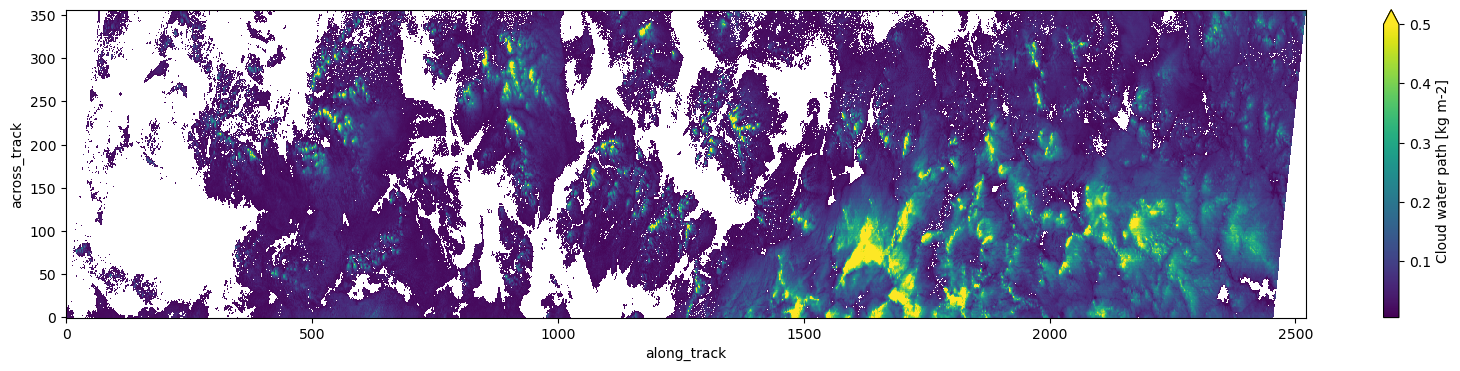

In [251]:
ds0.cloud_water_path.T.plot(vmax=0.5, figsize=(20,4))

In [227]:
ds0 = ds0.sel(along_track=slice(1500,2300)).sel(across_track=slice(0,150))

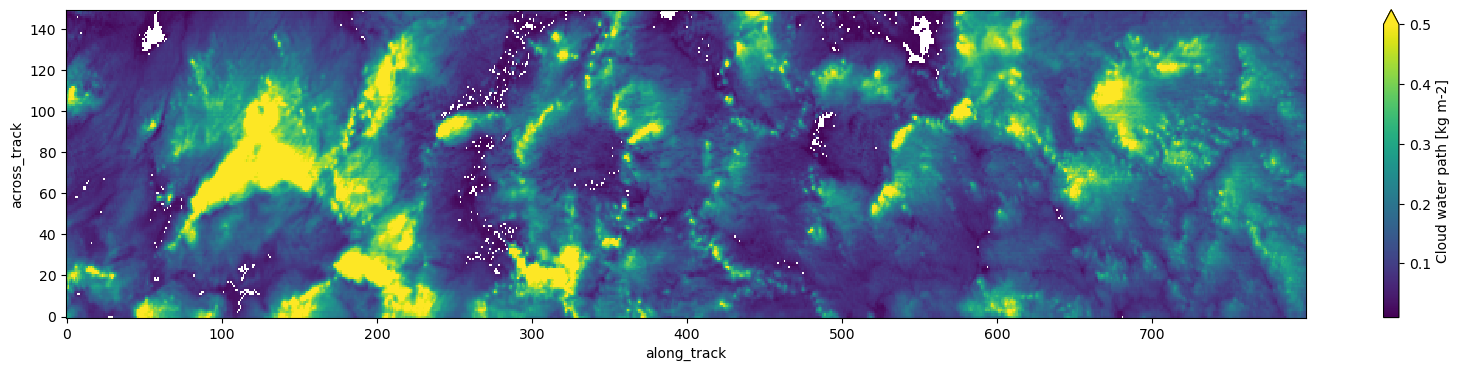

In [228]:
ds0.cloud_water_path.T.plot(vmax=0.5, figsize=(20,4))

In [229]:
da = ds0.cloud_water_path
da_clean = da.where(np.isfinite(da))
lwp_mean = da_clean.mean()
lwp_std = da_clean.std()
print(lwp_mean, lwp_std)

<xarray.DataArray 'cloud_water_path' ()> Size: 4B
array(0.18260883, dtype=float32) <xarray.DataArray 'cloud_water_path' ()> Size: 4B
array(0.1329771, dtype=float32)


In [230]:
(lwp_mean / lwp_std)**2

<xarray.DataArray 'cloud_water_path' ()> Size: 4B
array(1.885775, dtype=float32)

<Axes: ylabel='Count'>

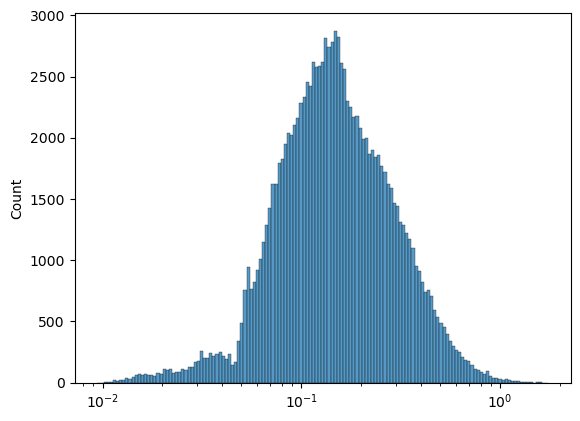

In [231]:
sns.histplot(da_clean.values.flatten(), log_scale=True)

In [232]:
# Calculate the skewness 
scipy.stats.skew(da_clean.values.flatten(), bias=False, nan_policy='omit')

np.float64(2.1961677074432373)

In [233]:
# Calculate the skewness 
scipy.stats.kurtosis(da_clean.values.flatten(), nan_policy='omit')

np.float32(7.9883585)

## Power spectrum

In [234]:
da = ds0.cloud_water_path
da_clean = da.where(np.isfinite(da))
image = np.where(np.isnan(da_clean.values), 0, da_clean.values)
image = np.where(np.isnan(da_clean.values), 0, 1)
F = np.fft.fft2(image)
F_shifted = np.fft.fftshift(F)
power_spectrum = np.abs(F_shifted)**2

In [235]:
nx, ny = image.shape
kx = np.fft.fftfreq(nx) * nx
ky = np.fft.fftfreq(ny) * ny
kx_shifted = np.fft.fftshift(kx)
ky_shifted = np.fft.fftshift(ky)
KX, KY = np.meshgrid(kx_shifted, ky_shifted, indexing='ij')
wavenumber = np.sqrt(KX**2 + KY**2)

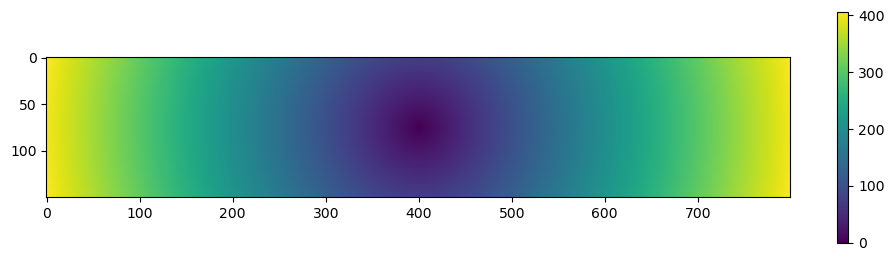

In [236]:
plt.figure(figsize=(12,3))
plt.imshow(wavenumber.T)
plt.colorbar()

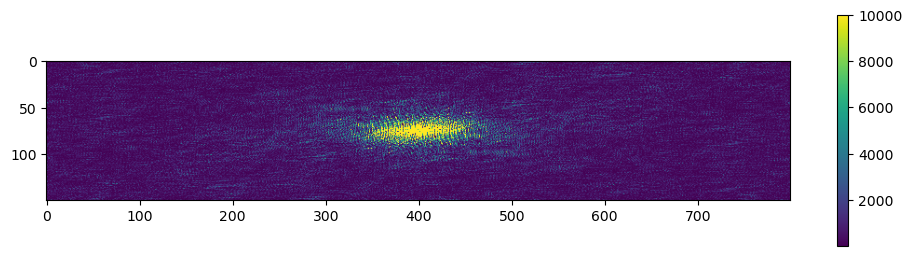

In [237]:
plt.figure(figsize=(12,3))
plt.imshow(power_spectrum.T, vmax=1e4)
plt.colorbar()

In [246]:
da_ps = xr.DataArray(data=power_flat, dims='k2', coords={'wavenumber': ('k2', wavenumber_flat)})
da_ps = da_ps.sortby('wavenumber')

In [247]:
da_ps

<xarray.DataArray (k2: 900354)> Size: 7MB
array([4.15265537e+11, 7.60141653e+09, 3.85791169e+08, ...,
       3.86501996e+03, 5.09647793e+03, 5.09647793e+03], shape=(900354,))
Coordinates:
    wavenumber  (k2) float64 7MB 0.0 1.0 1.0 ... 1.273e+03 1.274e+03 1.274e+03
Dimensions without coordinates: k2

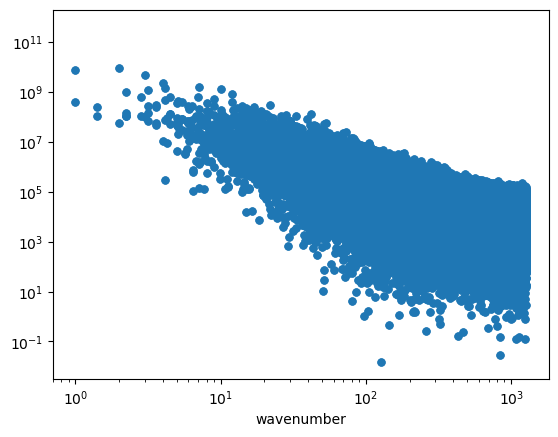

In [241]:
da_ps.plot.scatter(xscale='log', yscale='log', lw=0)#, ylim=(-1e6,5e8))

In [192]:
wavenumber_flat = wavenumber.ravel()
power_flat = power_spectrum.ravel()

# Define bins for wavenumber
bins = np.linspace(0, wavenumber_flat.max(), num=1000)
bin_indices = np.digitize(wavenumber_flat, bins)

power_binned = np.array([power_flat[bin_indices == i].mean() for i in range(1, len(bins))])
bin_centers = (bins[:-1] + bins[1:]) / 2

In [193]:
probability_distribution = power_binned / power_binned.sum()

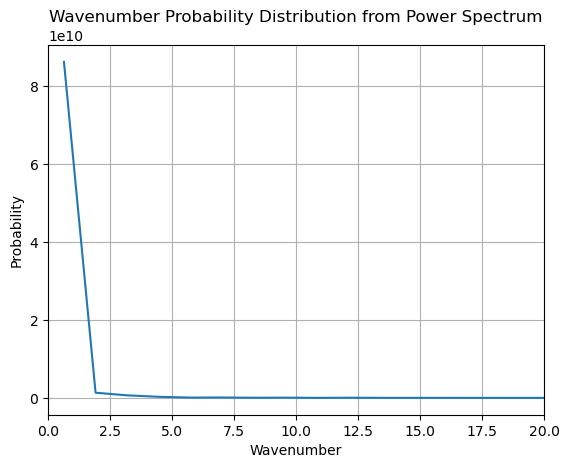

In [194]:
plt.plot(bin_centers, power_binned)
ax = plt.gca()
ax.set_xlim([0,20])
plt.xlabel('Wavenumber')
plt.ylabel('Probability')
plt.title('Wavenumber Probability Distribution from Power Spectrum')
plt.grid(True)
plt.show()
